In [32]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
np.random.seed(5151)
merged_df = pd.read_csv('./processed_data/merged_df.csv')
merged_df = merged_df.drop(columns=['Unnamed: 0'])
print(merged_df.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  \
0               4.423615     206.57       371.20               0.56   
1               4.888893     407.86       454.67               0.90   
2               5.694449     236.00       406.90               0.58   
3               4.777782     297.29       415.87               0.71   
4               4.091273     237.57       476.60               0.50   

   MonitoringScore  TrainingReadiness      Pain   Illness  Nutrition  wellness  
0         0.981035          -1.826823  0.364611  0.301008  -1.220

In [34]:
rpe_df = pd.read_csv('./processed_data/processed_rpe.csv')
rpe_df = rpe_df.drop(columns=['Unnamed: 0'])
print(rpe_df.head())

         Date  PlayerID  Training SessionType  Duration  RPE  SessionLoad  \
0  2017-08-01        15         1    Strength      60.0  4.0        240.0   
1  2017-08-01         1         1       Speed      60.0  3.0        180.0   
2  2017-08-01         1         1    Strength      90.0  4.0        360.0   
3  2017-08-01         3         1       Speed      45.0  5.0        225.0   
4  2017-08-01         3         1    Strength      90.0  5.0        450.0   

   DailyLoad  AcuteChronicRatio  ObjectiveRating  FocusRating  \
0      300.0               4.29              6.0          7.0   
1      540.0               4.29              0.0          0.0   
2      540.0               4.29              0.0          0.0   
3      675.0               4.29              7.0          7.0   
4      675.0               4.29              7.0          7.0   

   BestOutOfMyself  AcuteLoad  ChronicLoad  
0              3.0      42.86         10.0  
1              3.0      77.14         18.0  
2          

In [35]:
wellness_df = pd.read_csv('./processed_data/processed_wellness.csv')
wellness_df = wellness_df.drop(columns=['Unnamed: 0'])
print(wellness_df.head())

         Date  PlayerID  MonitoringScore  TrainingReadiness      Pain  \
0  2018-07-21         1        -1.450204          -1.826823  0.364611   
1  2018-07-21         2         0.170622          -1.826823 -2.742646   
2  2018-07-21         3         0.170622           0.795746  0.364611   
3  2018-07-21         4        -0.909929           0.664618  0.364611   
4  2018-07-21         5         0.440759           0.795746  0.364611   

    Illness  Nutrition  wellness  
0  0.301008   0.722090 -1.889318  
1  0.301008   0.722090 -3.375750  
2  0.301008   0.722090  2.354077  
3  0.301008   0.722090  1.142398  
4  0.301008  -1.220149  0.681976  


In [36]:
merged_df.columns

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'TrainingReadiness', 'Pain',
       'Illness', 'Nutrition', 'wellness'],
      dtype='object')

# Performance vs Training load graphs per player

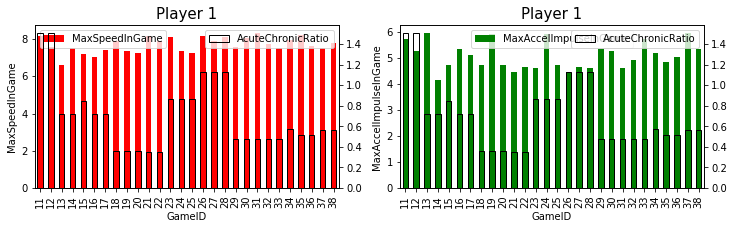

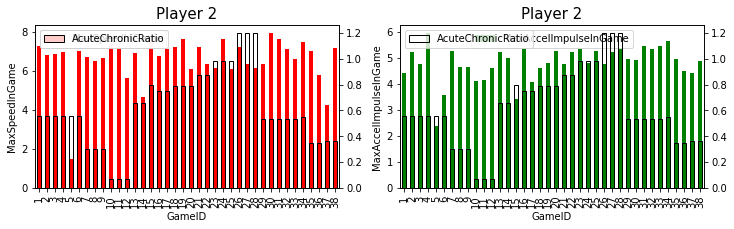

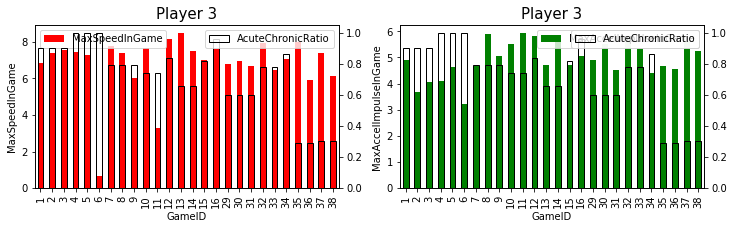

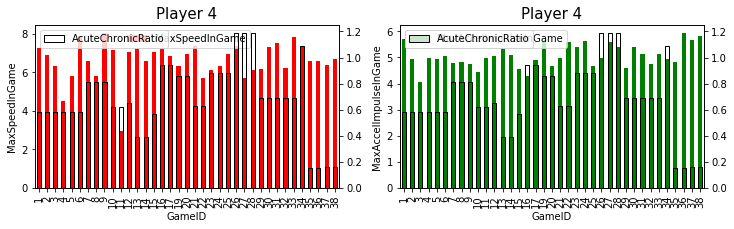

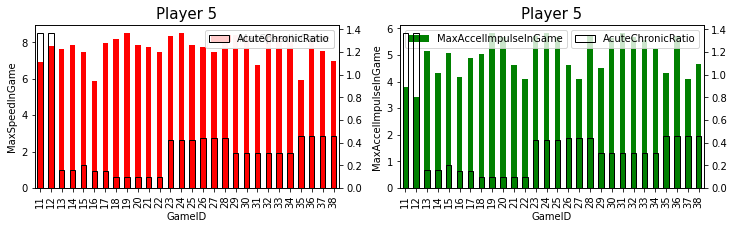

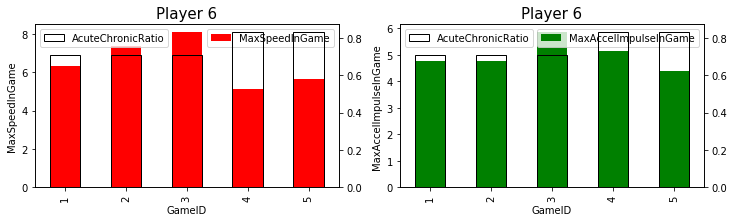

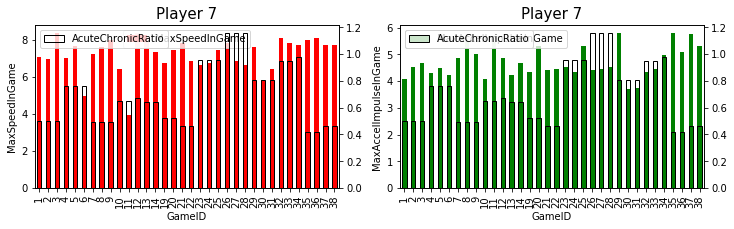

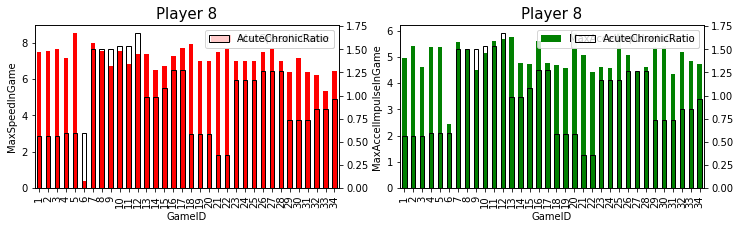

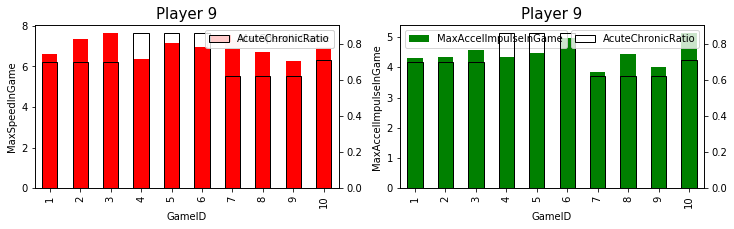

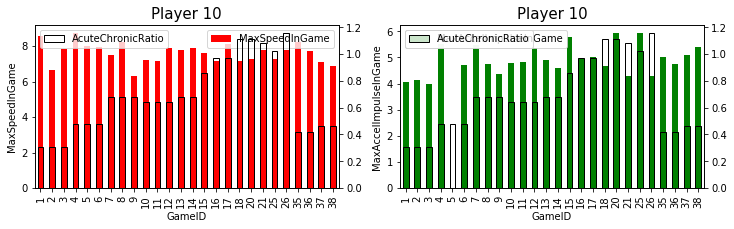

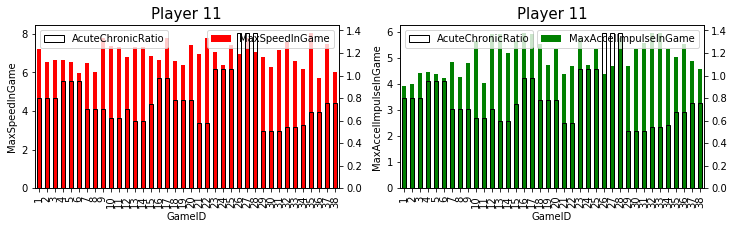

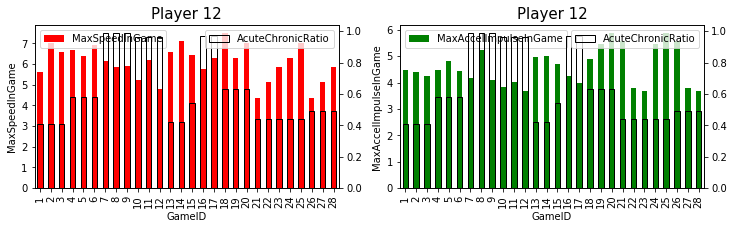

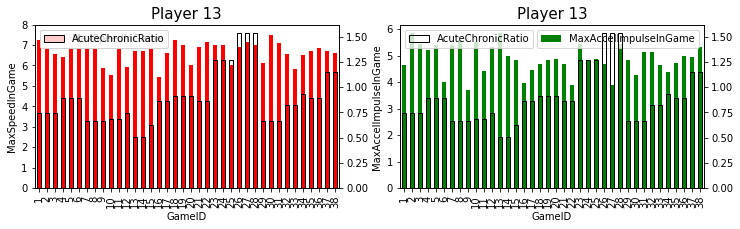

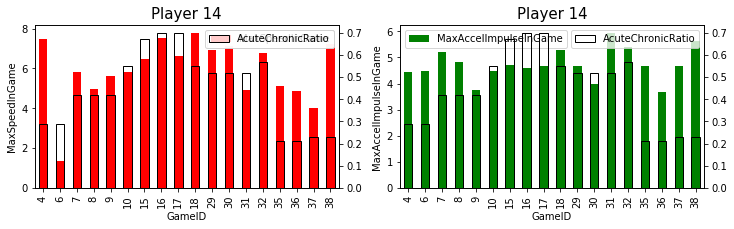

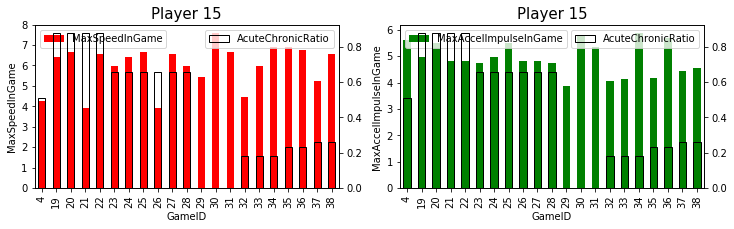

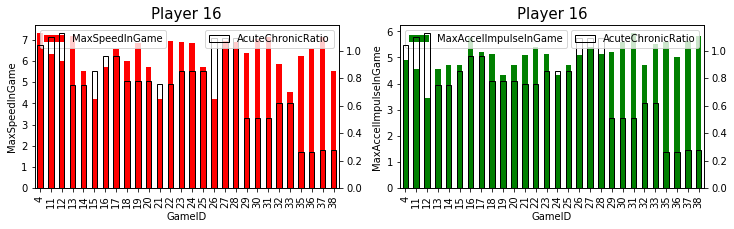

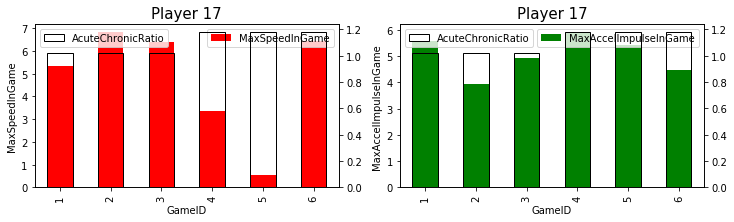

In [37]:
grouped = merged_df.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     group[]
    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="AcuteChronicRatio",fill=False)

    ax1.set_title('Player ' + str(name), fontsize=15)

#     plt.xticks(group["MaxSpeedInGame"], group["MaxSpeedInGame"], rotation=90)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="GameID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='blue',
                    x='GameID',
                    y="AcuteChronicRatio",fill=False)
    #ax4.tick_params('AcuteLoad', colors='b')
    
    #ax1.set_xticks(np.arange(1, 39, 1.0))
    ax2.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

# Performance vs Training load graphs for each game for all players

C:\Users\Sarasadat\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


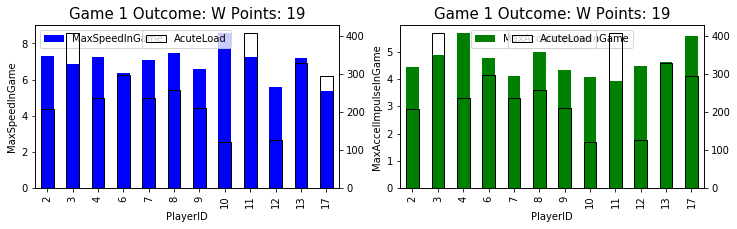

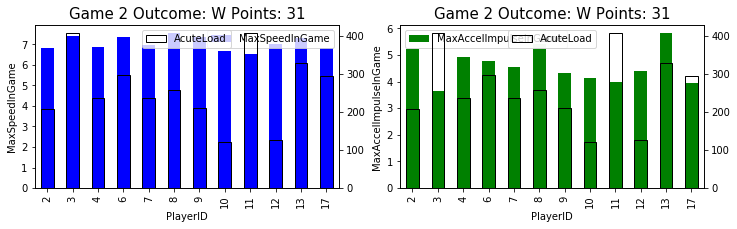

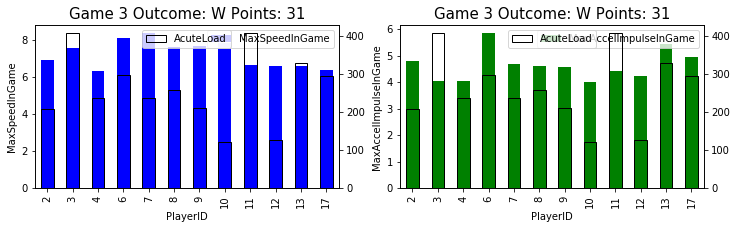

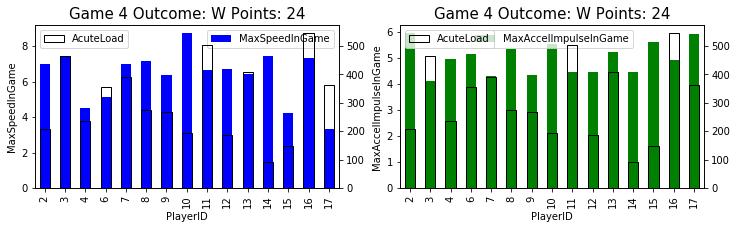

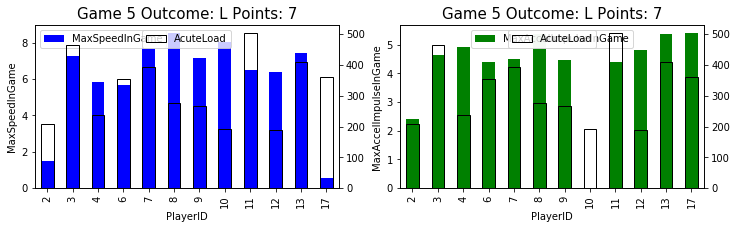

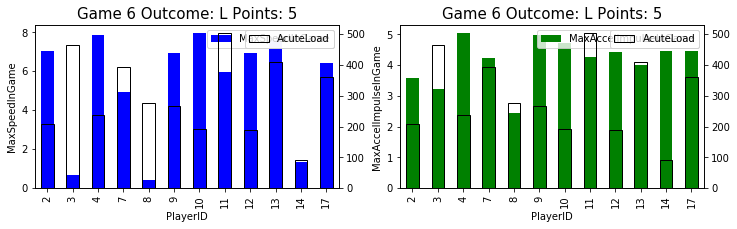

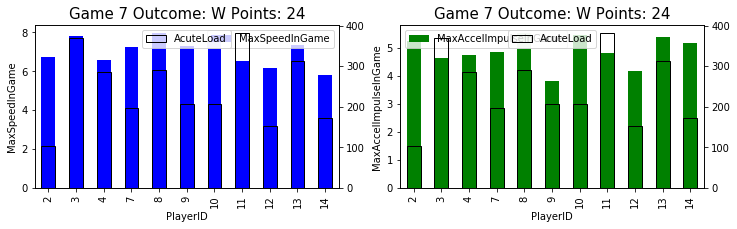

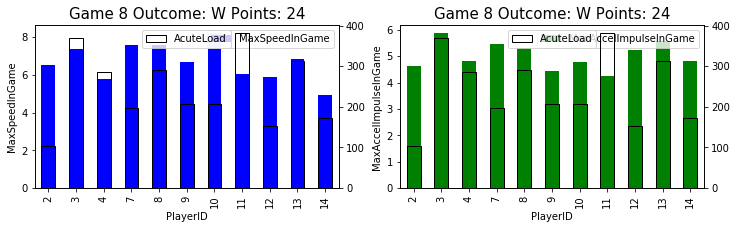

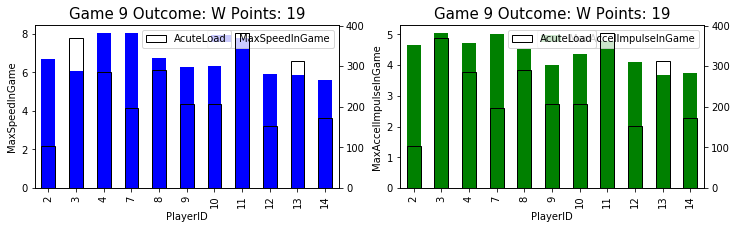

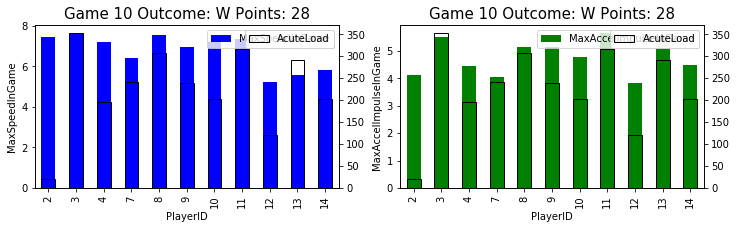

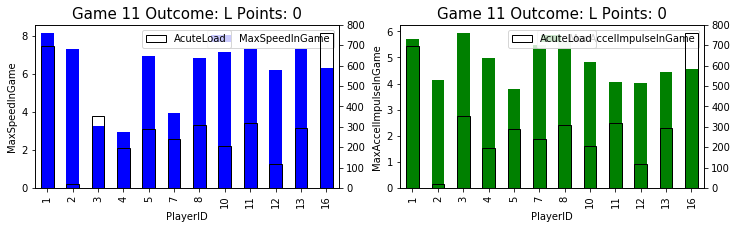

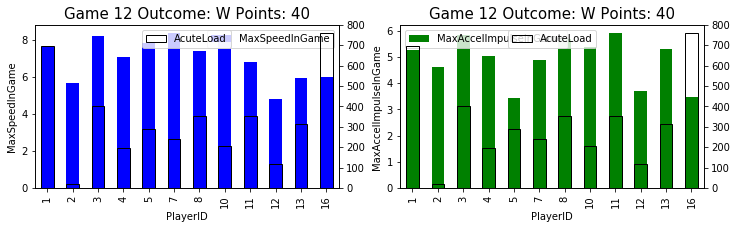

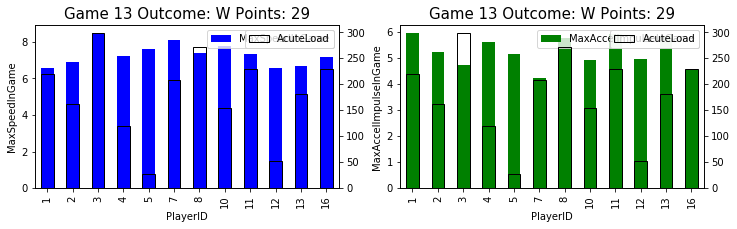

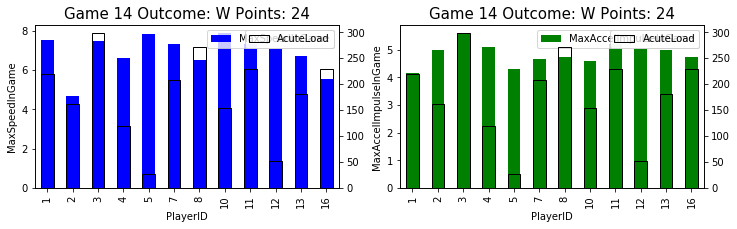

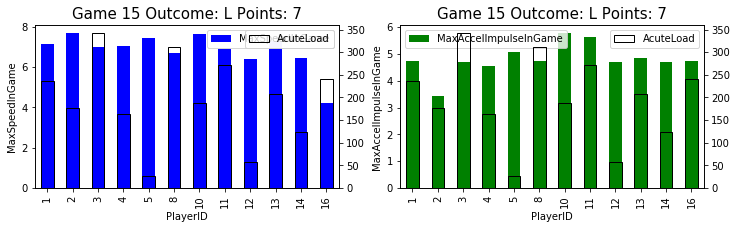

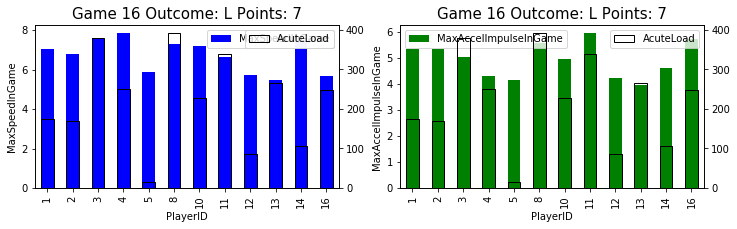

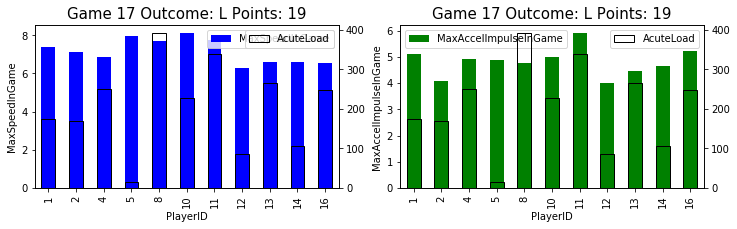

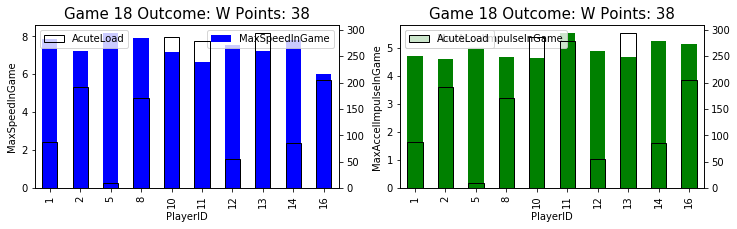

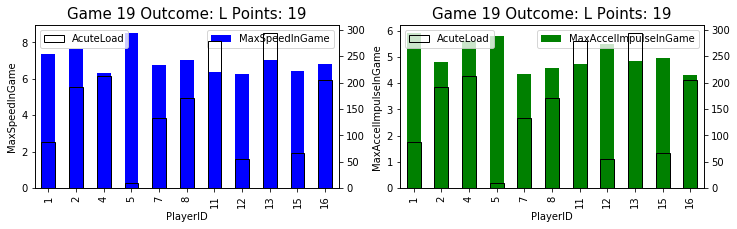

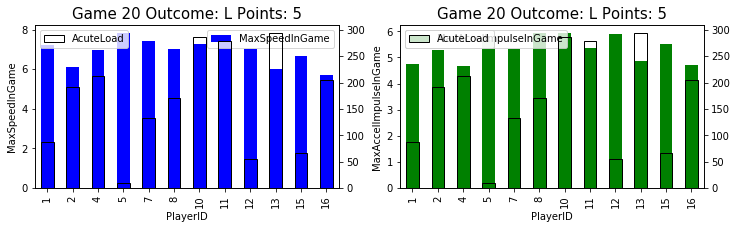

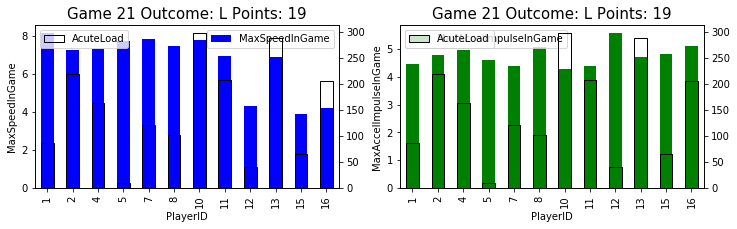

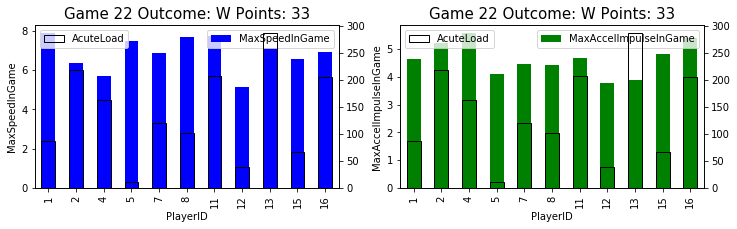

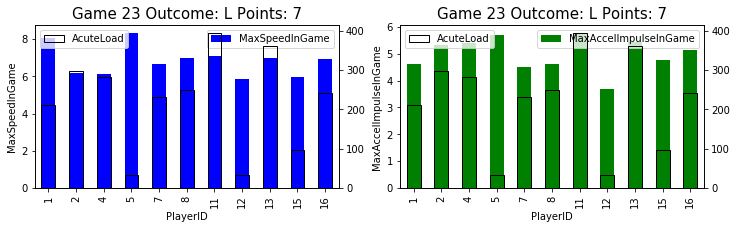

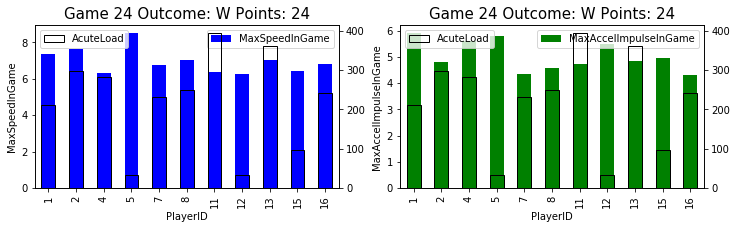

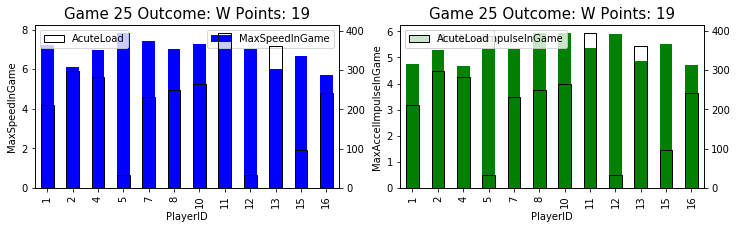

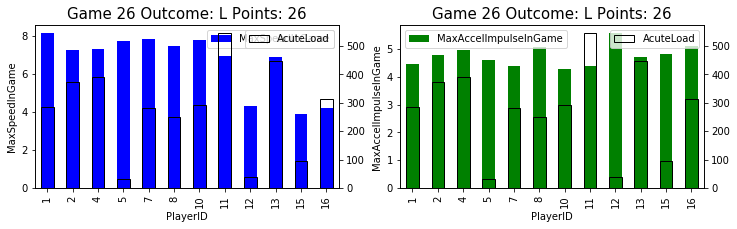

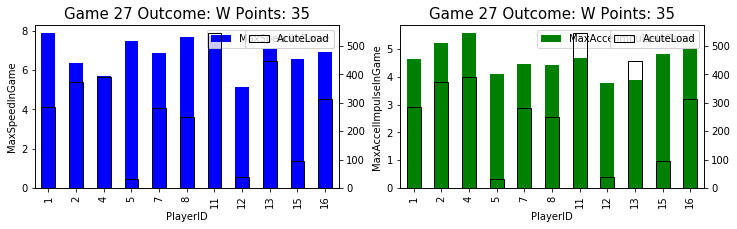

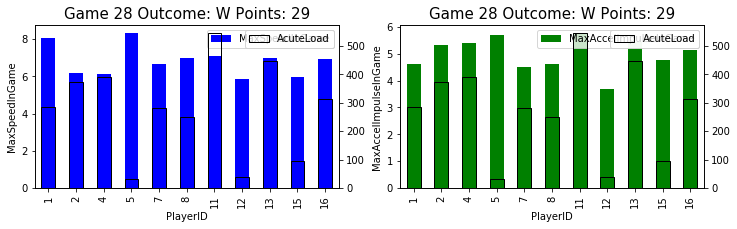

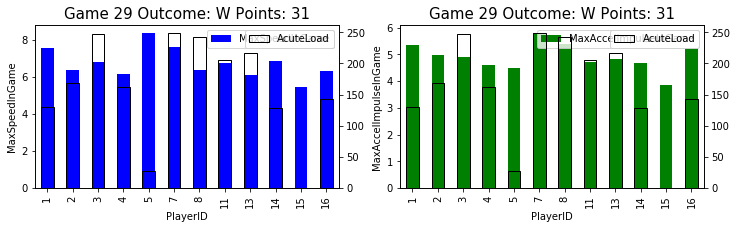

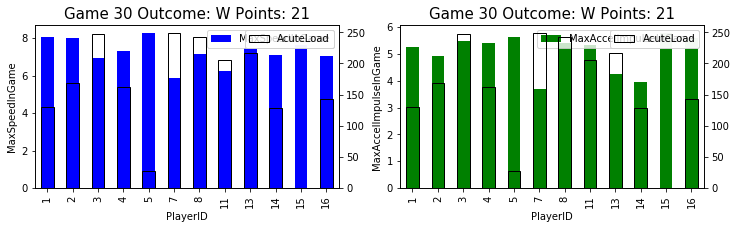

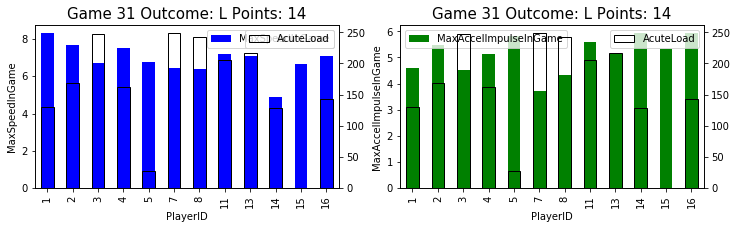

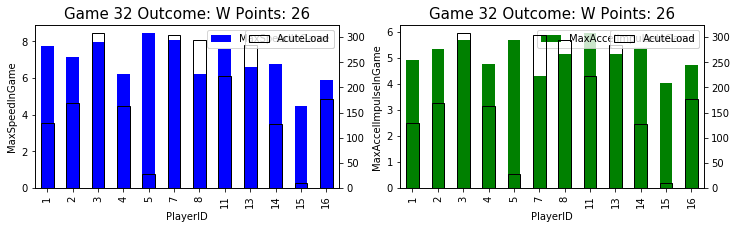

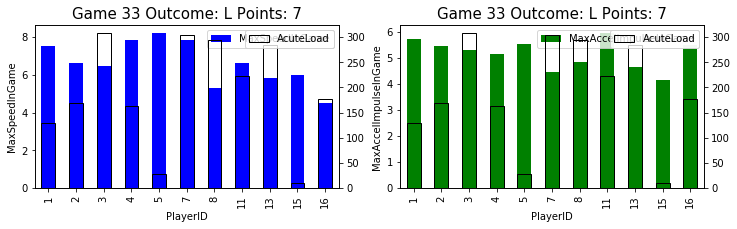

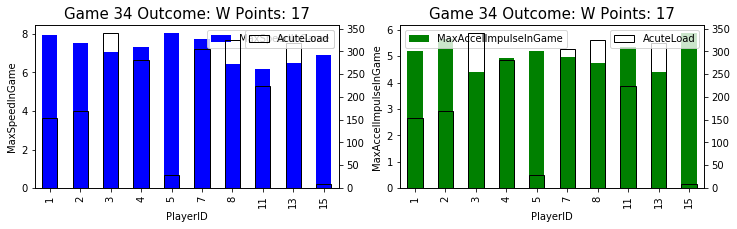

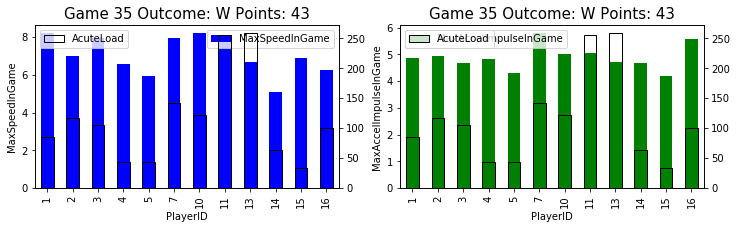

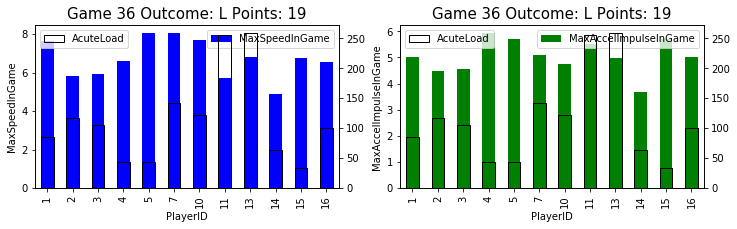

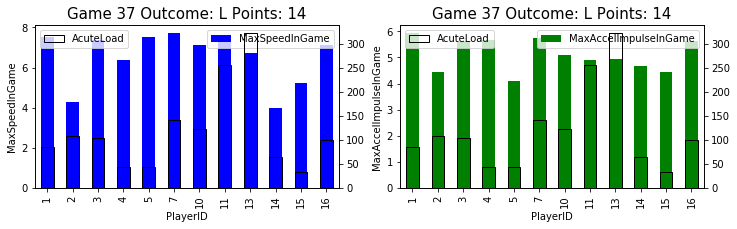

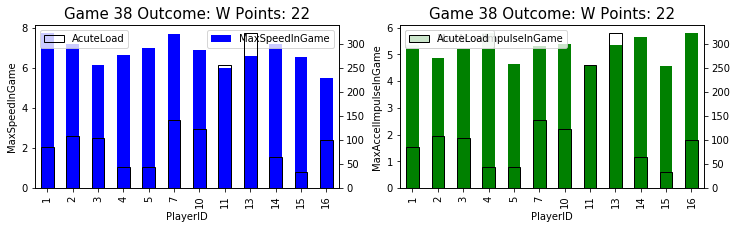

In [38]:
grouped_by_game = merged_df.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     ax.set_yticks(np.arange(min(y), max(y)+1, 1.0))
    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxAccelImpulseInGame")
    ax2.set_ylabel('MaxAccelImpulseInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="AcuteLoad",fill=False)

plt.show()
plt.close()

# Performance vs wellness graphs per player

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'TrainingReadiness', 'Pain',
       'Illness', 'Nutrition', 'wellness'],
      dtype='object')
   GameID Outcome  TeamPoints  MaxSpeedInGame  MaxAccelImpulseInGame  \
0       1       W          19        6.905650               4.654848   
1       2       W          31        7.059107               4.598268   
2       3       W          31        7.214642               4.633742   
3       4       W          24        6.362237               4.984881   
6       7       W          24        6.997822               4.917512   

   wellness  MonitoringScore   AcuteLoad  
0  1.907149         0.936012  260.905000  
1  1.907149         0.936012  260.905000  
2  1.907149         0.936012  260.905000  
3  0.489565        -0.135534  309.343333  
6  1.734504         0.710897  243.519091  
    GameID Outcome  TeamPoi

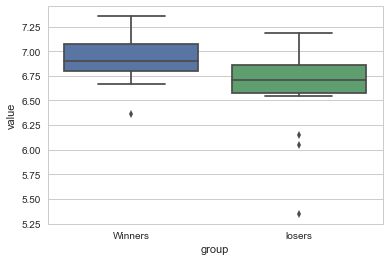

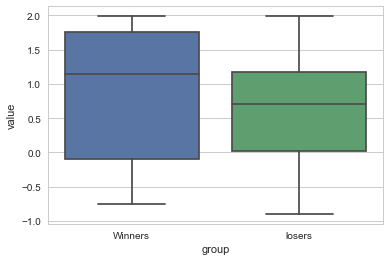

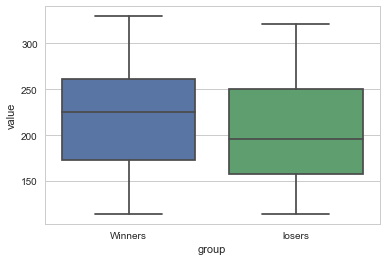

In [51]:
import seaborn as sns
print(merged_df.columns)
avg_speed_per_game = merged_df[['GameID','Outcome','TeamPoints','MaxSpeedInGame','MaxAccelImpulseInGame','wellness','MonitoringScore','AcuteLoad']].groupby(['GameID','Outcome','TeamPoints'],as_index=False).mean()
winners = avg_speed_per_game[avg_speed_per_game['Outcome'] == 'W']
losers = avg_speed_per_game[avg_speed_per_game['Outcome'] == 'L']
print(winners.head())
print(losers.head())
print('Max speed average')
print(winners['MaxSpeedInGame'].mean())
print(losers['MaxSpeedInGame'].mean())
print('max accel average')
print(winners['MaxAccelImpulseInGame'].mean())
print(losers['MaxAccelImpulseInGame'].mean())
from scipy import stats

t, p = stats.ttest_ind(winners['MaxSpeedInGame'], losers['MaxSpeedInGame'])

print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
t, p = stats.ttest_ind(winners['MaxAccelImpulseInGame'], losers['MaxAccelImpulseInGame'])

print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
t, p = stats.ttest_ind(winners['AcuteLoad'], losers['AcuteLoad'])

print("p-value is: %.4f" % p," t-statistic is: %.2f" % t)
plt.figure()
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="group", ylabel="value")
sns.boxplot(data=[winners['MaxSpeedInGame'], losers['MaxSpeedInGame']])
plt.xticks(plt.xticks()[0], ["Winners","losers"])
plt.show()
plt.figure()
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="group", ylabel="value")
sns.boxplot(data=[winners['wellness'], losers['wellness']])
plt.xticks(plt.xticks()[0], ["Winners","losers"])
plt.show()
plt.figure()
sns.set(context='notebook', style='whitegrid')
sns.utils.axlabel(xlabel="group", ylabel="value")
sns.boxplot(data=[winners['AcuteLoad'], losers['AcuteLoad']])
plt.xticks(plt.xticks()[0], ["Winners","losers"])
plt.show()

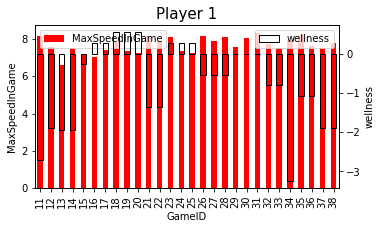

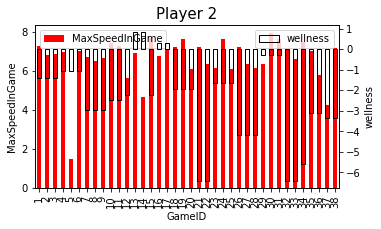

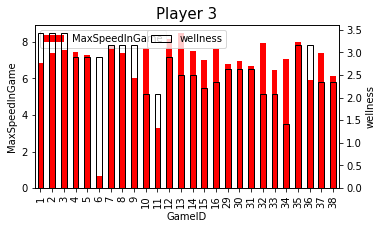

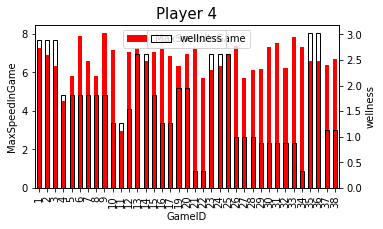

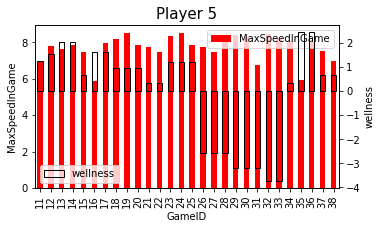

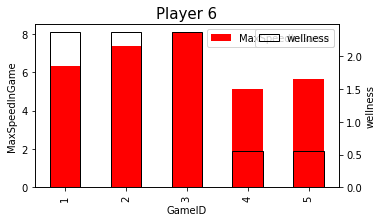

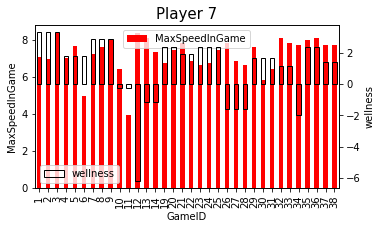

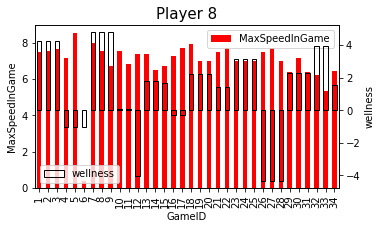

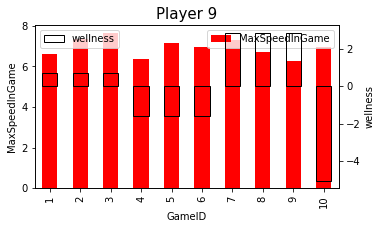

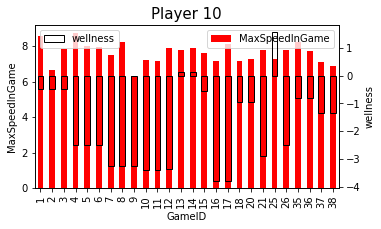

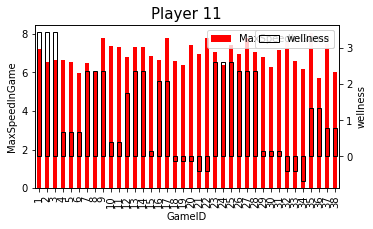

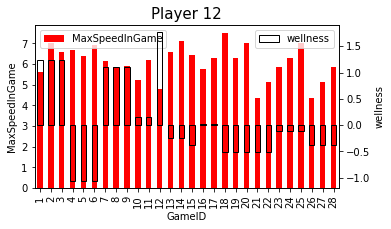

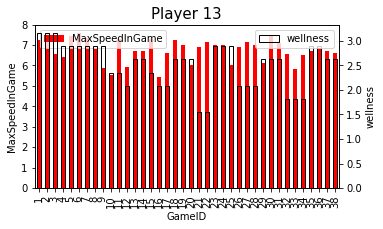

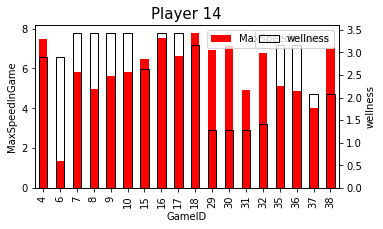

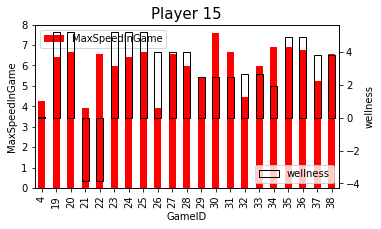

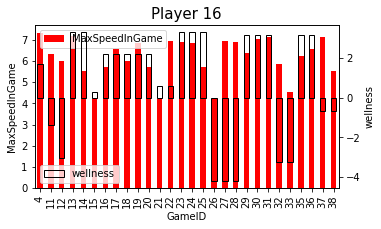

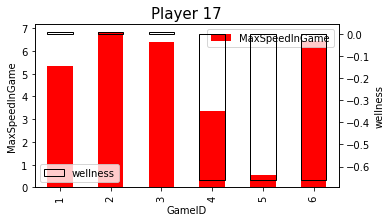

In [8]:
grouped = merged_df.groupby('PlayerID')

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     group[]
    group.plot.bar(ax=ax1, color='red',x="GameID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='blue',x="GameID",y="wellness",fill=False)
    ax3.set_ylabel('wellness')
    ax1.set_title('Player ' + str(name), fontsize=15)



plt.show()
plt.close()

# Performance vs wellness and nutrition load graphs for each game for all players

C:\Users\Sarasadat\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


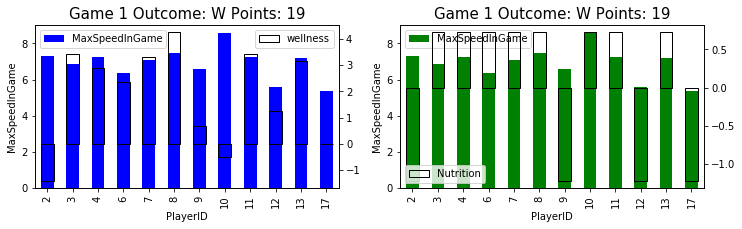

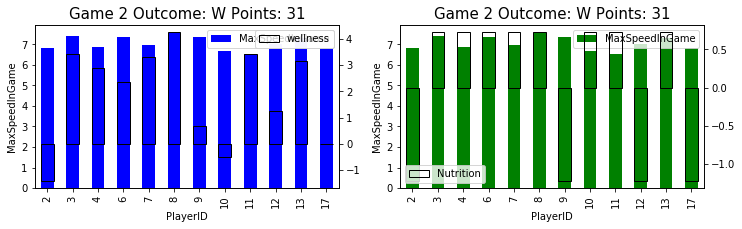

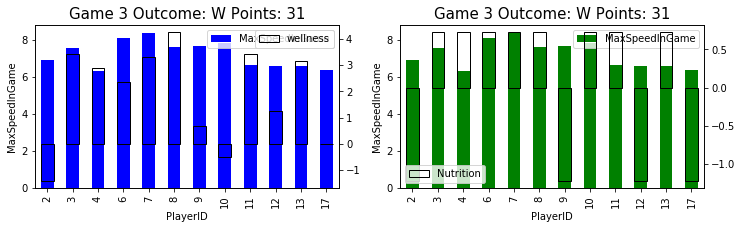

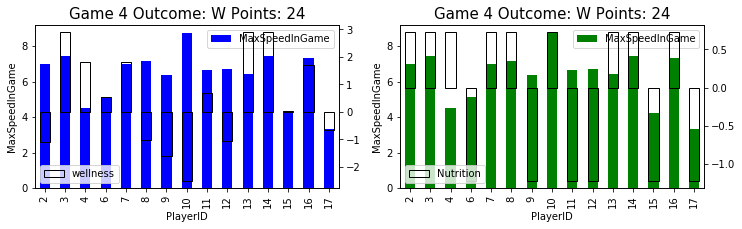

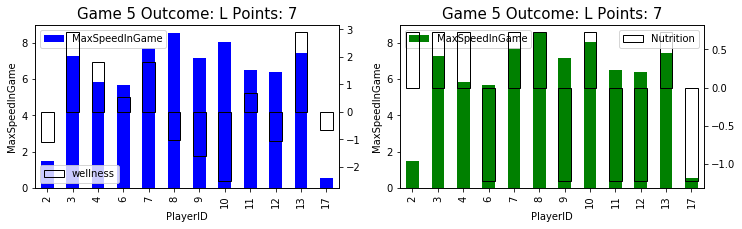

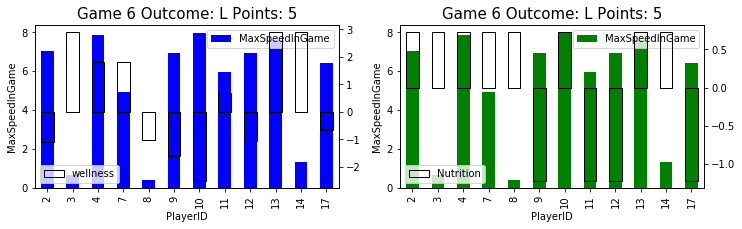

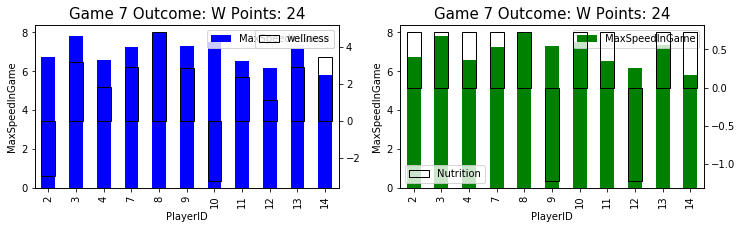

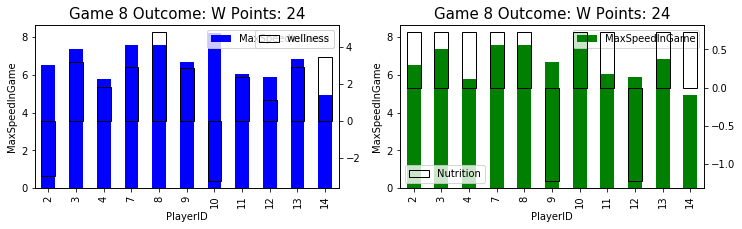

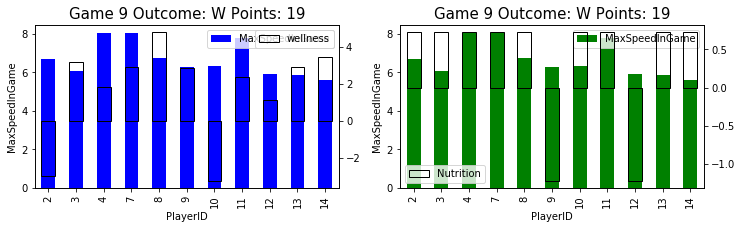

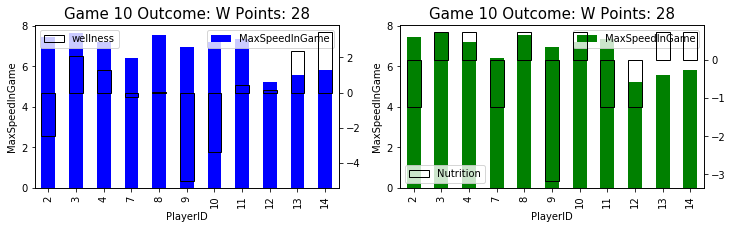

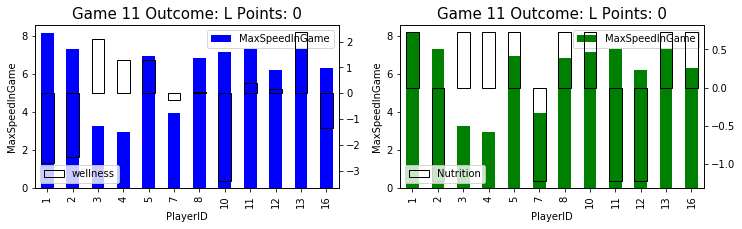

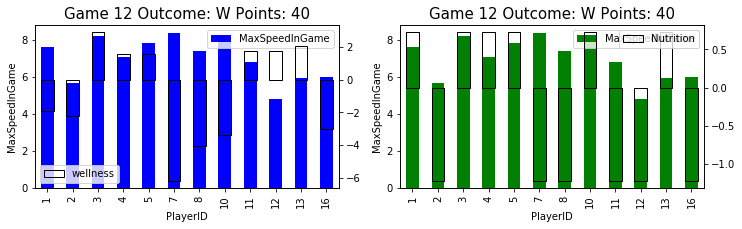

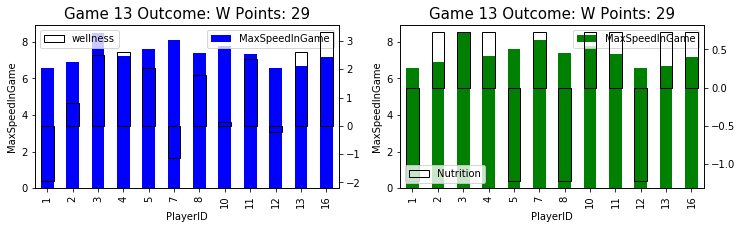

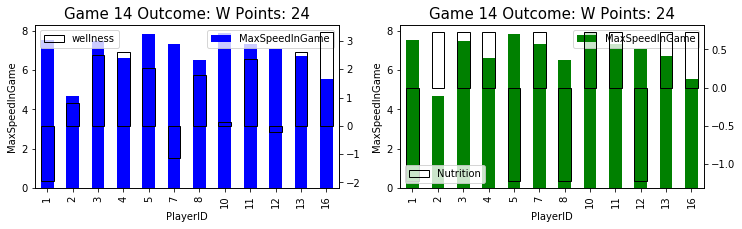

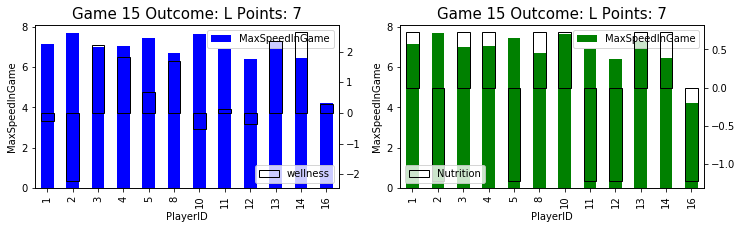

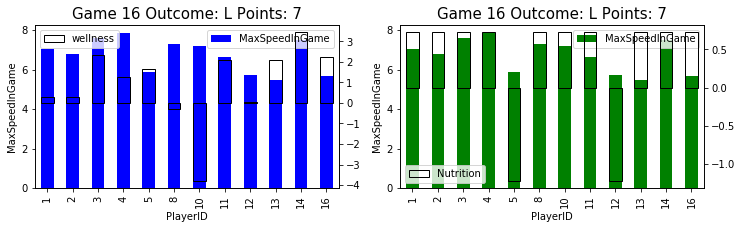

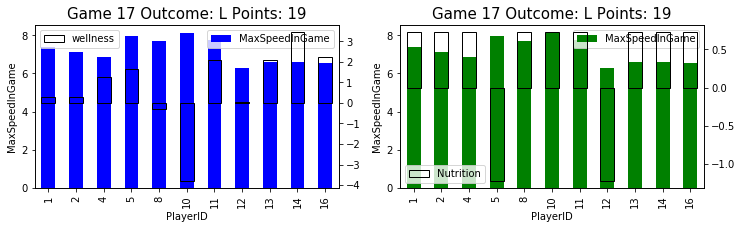

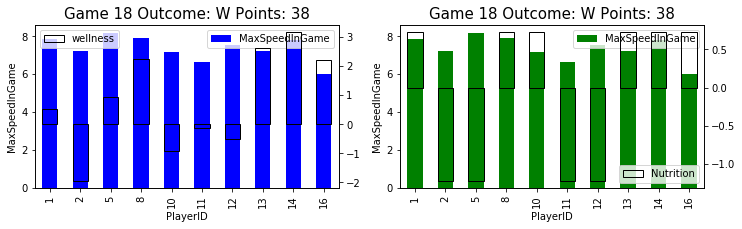

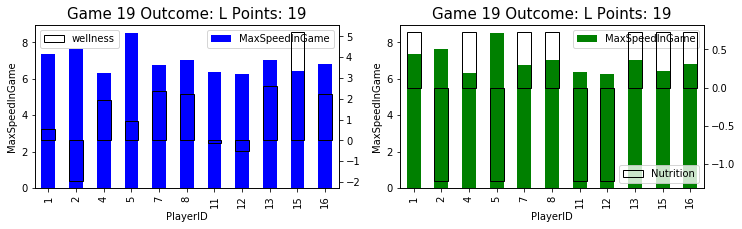

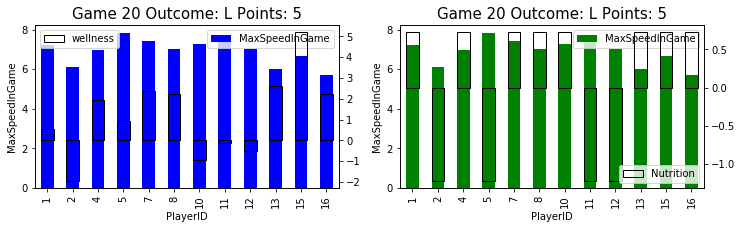

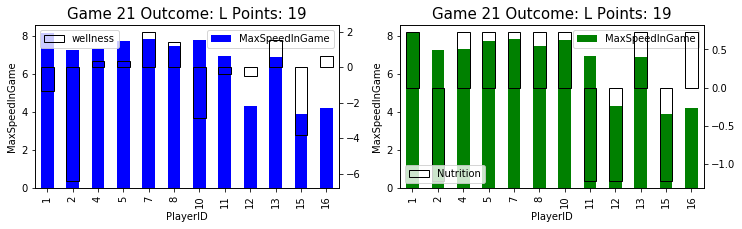

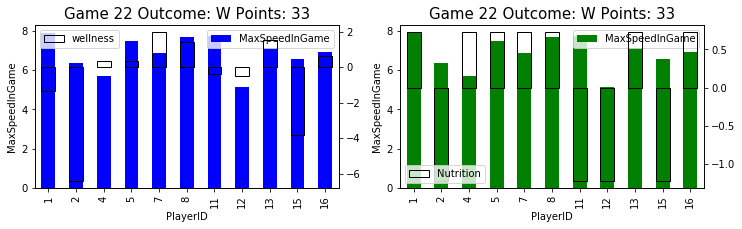

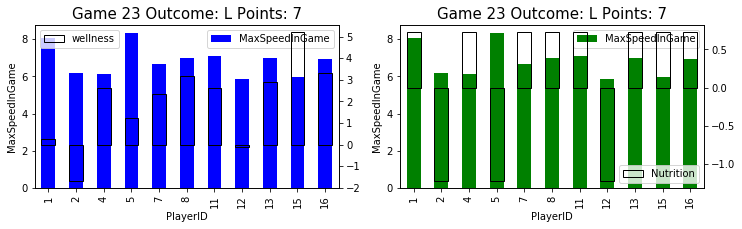

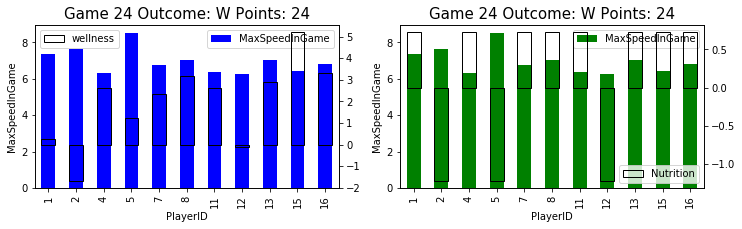

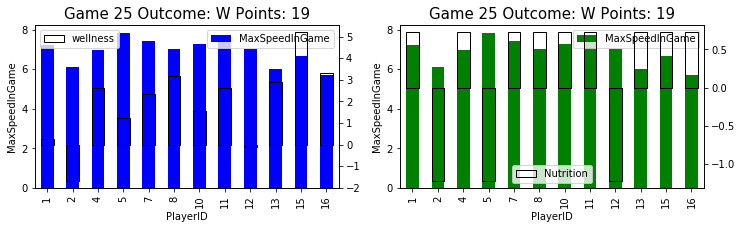

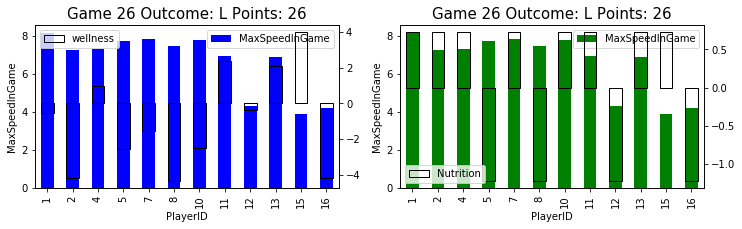

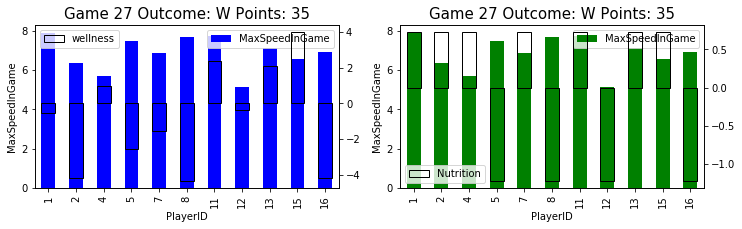

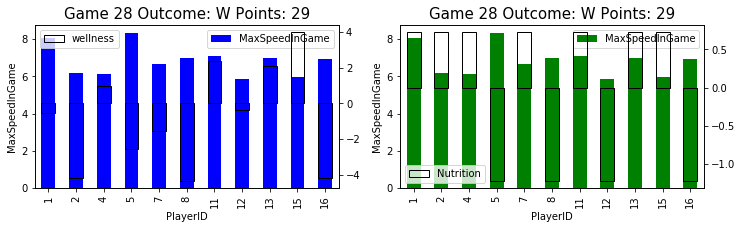

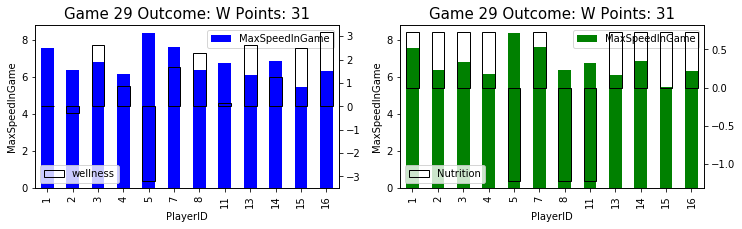

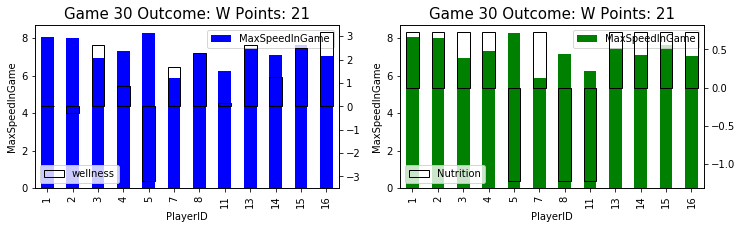

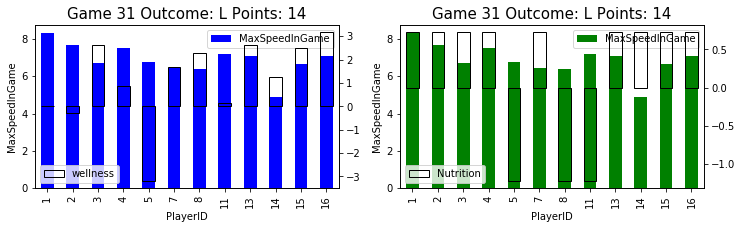

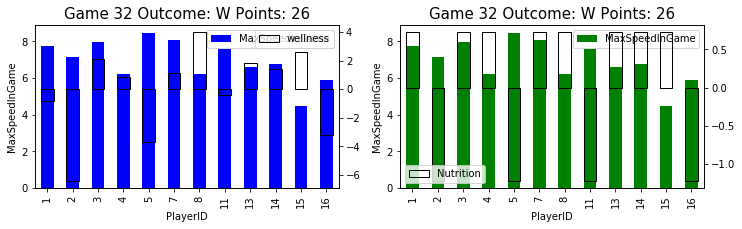

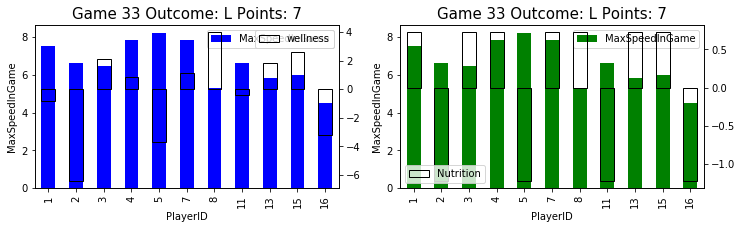

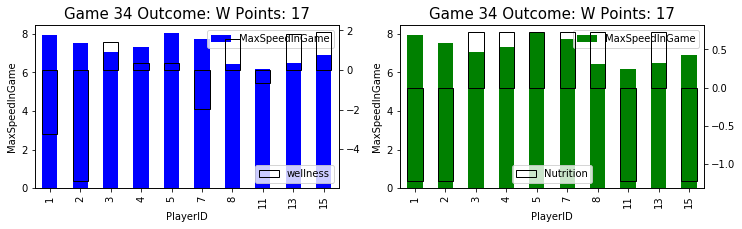

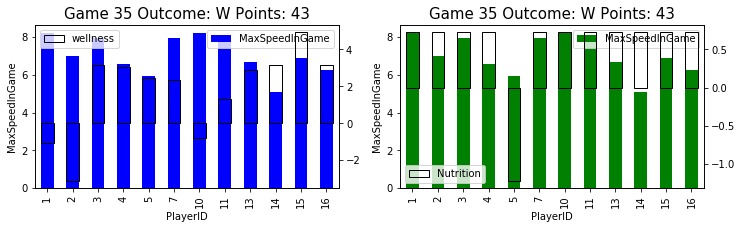

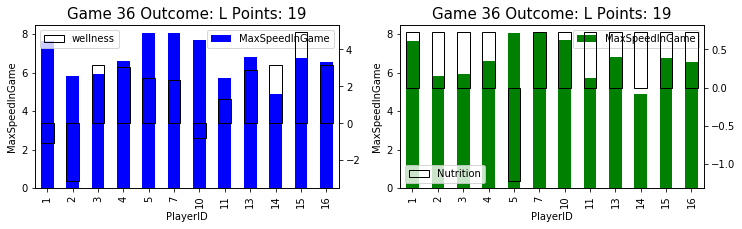

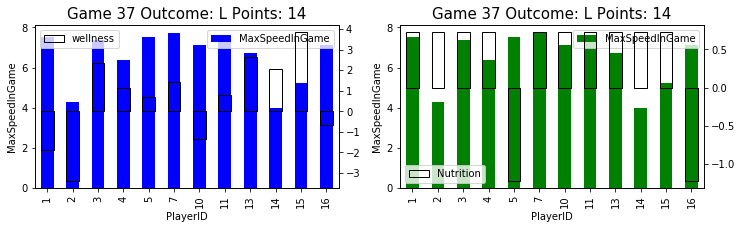

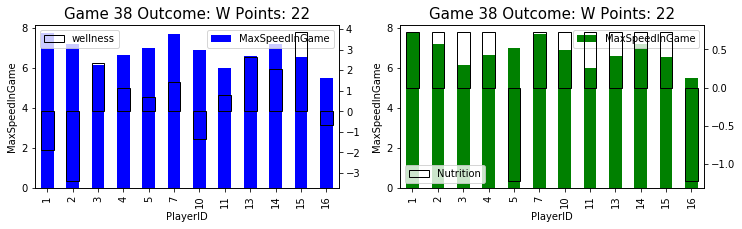

In [9]:
grouped_by_game = merged_df.groupby(['GameID','Outcome','TeamPoints'])

for name,group in grouped_by_game:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(121)
#     ax.set_yticks(np.arange(min(y), max(y)+1, 1.0))
    group.plot.bar(ax=ax1, color='blue',x="PlayerID",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax1.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax3 = ax1.twinx()
    group.plot.bar(ax=ax3, color='red',
                    x='PlayerID',
                    y="wellness",fill=False)
    ax2 = fig.add_subplot(122)
    group.plot.bar(ax=ax2, color='green',x="PlayerID",y="MaxSpeedInGame")
    ax2.set_ylabel('MaxSpeedInGame')
    ax2.set_title('Game ' + str(name[0])+ 
                  ' Outcome: ' + str(name[1]) + 
                  ' Points: ' + str(name[2]), fontsize=15)
    ax4 = ax2.twinx()
    group.plot.bar(ax=ax4, color='red',
                    x='PlayerID',
                    y="Nutrition",fill=False)

plt.show()
plt.close()

In [10]:
print(len(rpe_df),len(wellness_df))
merged_df = rpe_df.merge(wellness_df,
    how='inner', on= ['Date','PlayerID']).drop_duplicates()
print(len(merged_df))


8860 5011
8416


Unfortunately there is no special relationship between the clusters for prformance, training and wellness.

In [11]:
merged_df.columns

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteChronicRatio', 'ObjectiveRating',
       'FocusRating', 'BestOutOfMyself', 'AcuteLoad', 'ChronicLoad',
       'MonitoringScore', 'TrainingReadiness', 'Pain', 'Illness', 'Nutrition',
       'wellness'],
      dtype='object')

# Training load on the day before and today's wellness

In [12]:
print(rpe_df.columns)
print(wellness_df.head())
yesterday_rpe = rpe_df.copy()[['Date','PlayerID','Training','SessionLoad','RPE','DailyLoad']]
print(yesterday_rpe.head())
yesterday_rpe['Date'] = pd.to_datetime(yesterday_rpe['Date'],format='%Y-%m-%d')
yesterday_rpe['Date'] = pd.DatetimeIndex(yesterday_rpe['Date']) + pd.DateOffset(1)
print(yesterday_rpe.head())

Index(['Date', 'PlayerID', 'Training', 'SessionType', 'Duration', 'RPE',
       'SessionLoad', 'DailyLoad', 'AcuteChronicRatio', 'ObjectiveRating',
       'FocusRating', 'BestOutOfMyself', 'AcuteLoad', 'ChronicLoad'],
      dtype='object')
         Date  PlayerID  MonitoringScore  TrainingReadiness      Pain  \
0  2018-07-21         1        -1.450204          -1.826823  0.364611   
1  2018-07-21         2         0.170622          -1.826823 -2.742646   
2  2018-07-21         3         0.170622           0.795746  0.364611   
3  2018-07-21         4        -0.909929           0.664618  0.364611   
4  2018-07-21         5         0.440759           0.795746  0.364611   

    Illness  Nutrition  wellness  
0  0.301008   0.722090 -1.889318  
1  0.301008   0.722090 -3.375750  
2  0.301008   0.722090  2.354077  
3  0.301008   0.722090  1.142398  
4  0.301008  -1.220149  0.681976  
         Date  PlayerID  Training  SessionLoad  RPE  DailyLoad
0  2017-08-01        15         1        240.0  

In [13]:
wellness_df['Date'] = pd.to_datetime(wellness_df['Date'],format='%Y-%m-%d')
wellness_with_yesterday_training = yesterday_rpe.merge(wellness_df,
    how='inner', on= ['Date','PlayerID'])[['Date','PlayerID','DailyLoad','MonitoringScore','TrainingReadiness','Pain','Illness','Nutrition','wellness']].drop_duplicates()
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1) | (wellness_with_yesterday_training['PlayerID'] == 2)])
# plot_df = wellness_with_yesterday_training.groupby()
# scatter_plot(wellness_with_yesterday_training, 'wellness', 'MaxSpeedInGame', 'wellness VS Performance')


           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0         0.170622           0.271233   
316  2017-08-17         2       40.0        -0.099516           0.271233   
343  2017-08-18         2      870.0         0.170622           0.140104   
346  2017-08-18         1      510.0         0.440759           0.402361   
378  2017-08-19         1     1230.0         0.710897          -1.826823   
385  2017-08-19         2     1170.0         0.981035          -1.826823   
408  2017-08-20         1        0.0         0.440759           0.795746   
409  2017-08-20         2        0.0         1.251172          -1.826823   
423  2017-08-21         2        0.0         0.440759           0.402361   
450  2017-08-22         2      570.0         1.251172           0.533489   
454  2017-08-22         1      670.0        -0.369654           0.402361   
488  2017-08-23         2      840.0        -0.099516          -0.122153   
493  2017-08

In [14]:
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0         0.170622           0.271233   
346  2017-08-18         1      510.0         0.440759           0.402361   
378  2017-08-19         1     1230.0         0.710897          -1.826823   
408  2017-08-20         1        0.0         0.440759           0.795746   
454  2017-08-22         1      670.0        -0.369654           0.402361   
493  2017-08-23         1     1080.0        -0.369654           0.008976   
520  2017-08-24         1        0.0        -0.639791           0.402361   
586  2017-08-26         1     1020.0        -0.369654          -1.826823   
610  2017-08-27         1        0.0        -0.099516          -1.826823   
620  2017-08-28         1        0.0         0.440759           0.140104   
651  2017-08-29         1      780.0         0.440759           0.008976   
688  2017-08-30         1      630.0        -0.369654           0.140104   
715  2017-08

In [15]:
wellness_with_yesterday_training.sort_values(by=['Date', 'PlayerID'], inplace=True)

# for this example, with diff, I think this syntax is a bit clunky
# but for more general examples, this should be good.  But can we do better?
wellness_with_yesterday_training['wellness_diffs'] = wellness_with_yesterday_training.groupby(['PlayerID'])['wellness'].transform(lambda x: x.diff()) 

wellness_with_yesterday_training.sort_index(inplace=True)
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 1)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
315  2017-08-17         1        0.0         0.170622           0.271233   
346  2017-08-18         1      510.0         0.440759           0.402361   
378  2017-08-19         1     1230.0         0.710897          -1.826823   
408  2017-08-20         1        0.0         0.440759           0.795746   
454  2017-08-22         1      670.0        -0.369654           0.402361   
493  2017-08-23         1     1080.0        -0.369654           0.008976   
520  2017-08-24         1        0.0        -0.639791           0.402361   
586  2017-08-26         1     1020.0        -0.369654          -1.826823   
610  2017-08-27         1        0.0        -0.099516          -1.826823   
620  2017-08-28         1        0.0         0.440759           0.140104   
651  2017-08-29         1      780.0         0.440759           0.008976   
688  2017-08-30         1      630.0        -0.369654           0.140104   
715  2017-08

In [16]:
print(wellness_with_yesterday_training[(wellness_with_yesterday_training['PlayerID'] == 2)])
processed = wellness_with_yesterday_training.copy()
processed['DailyLoad'] = StandardScaler().fit_transform(wellness_with_yesterday_training[['DailyLoad']])
print(processed[(processed['PlayerID'] == 2)])

           Date  PlayerID  DailyLoad  MonitoringScore  TrainingReadiness  \
316  2017-08-17         2       40.0        -0.099516           0.271233   
343  2017-08-18         2      870.0         0.170622           0.140104   
385  2017-08-19         2     1170.0         0.981035          -1.826823   
409  2017-08-20         2        0.0         1.251172          -1.826823   
423  2017-08-21         2        0.0         0.440759           0.402361   
450  2017-08-22         2      570.0         1.251172           0.533489   
488  2017-08-23         2      840.0        -0.099516          -0.122153   
517  2017-08-24         2       45.0         0.170622           0.140104   
550  2017-08-25         2      720.0         0.981035           0.533489   
581  2017-08-26         2      900.0         0.981035          -1.826823   
611  2017-08-27         2        0.0         2.331723          -1.826823   
621  2017-08-28         2        0.0         0.981035           0.008976   
648  2017-08

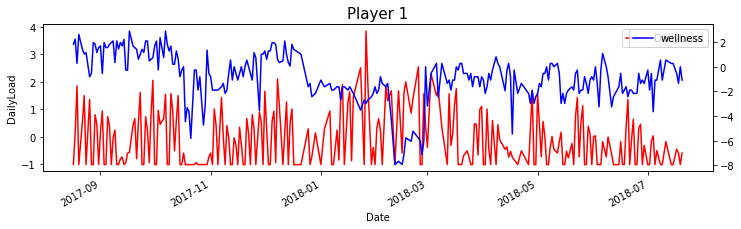

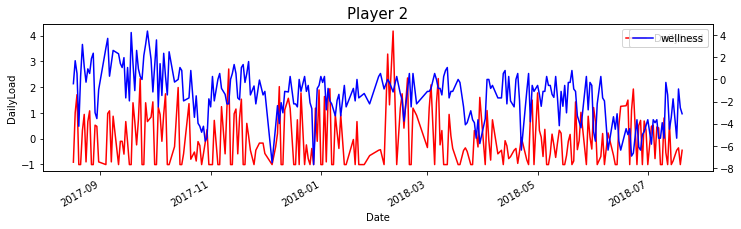

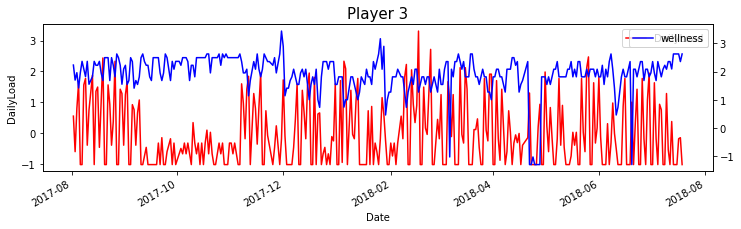

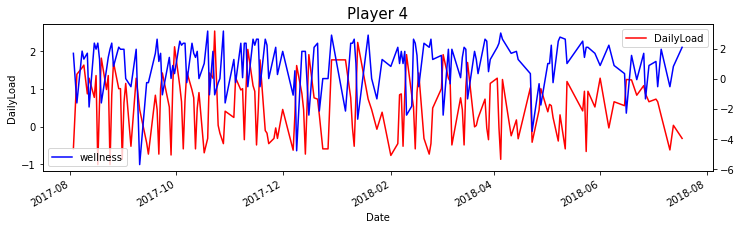

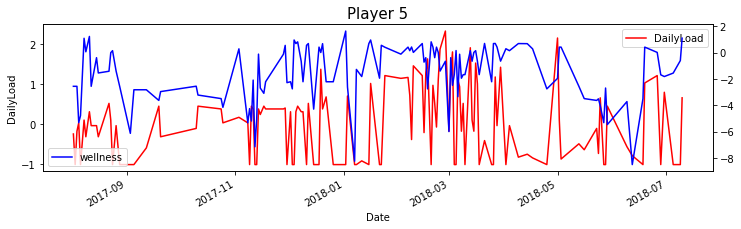

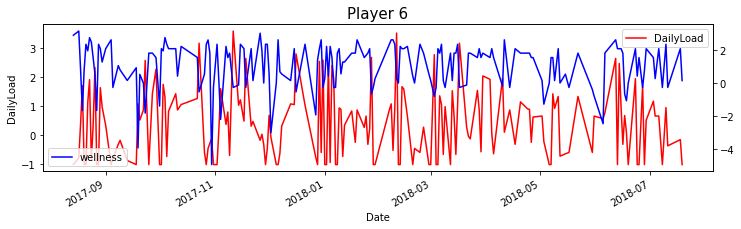

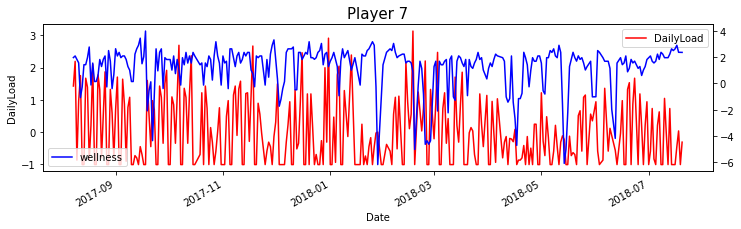

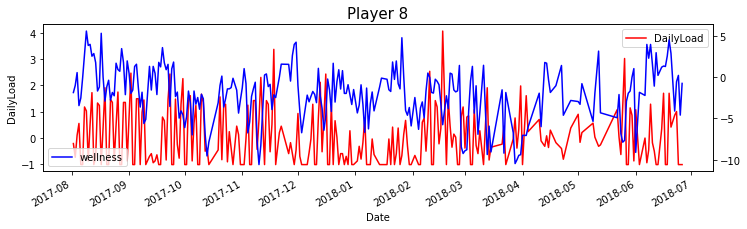

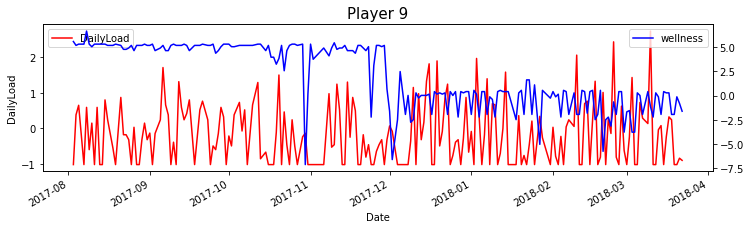

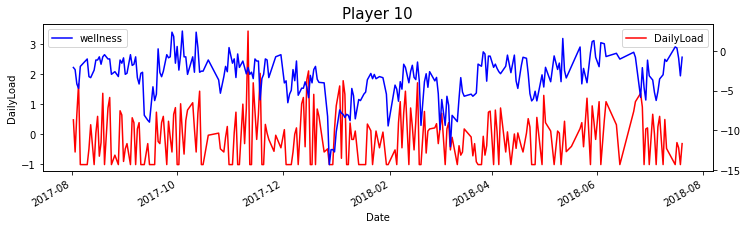

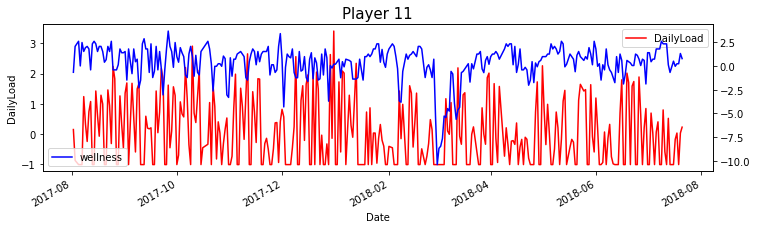

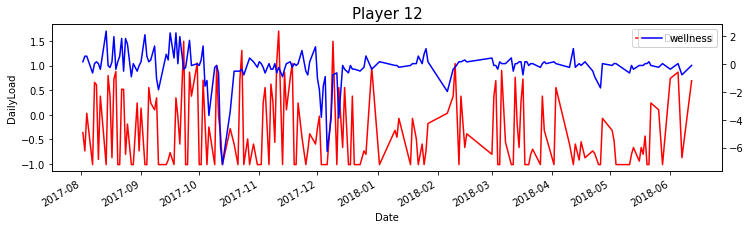

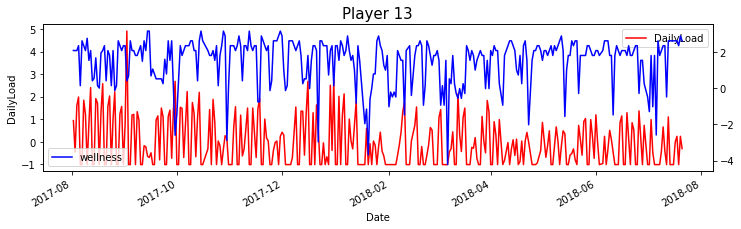

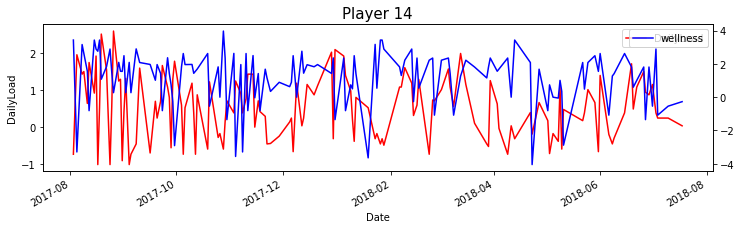

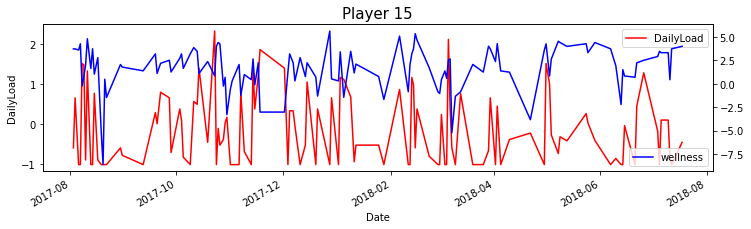

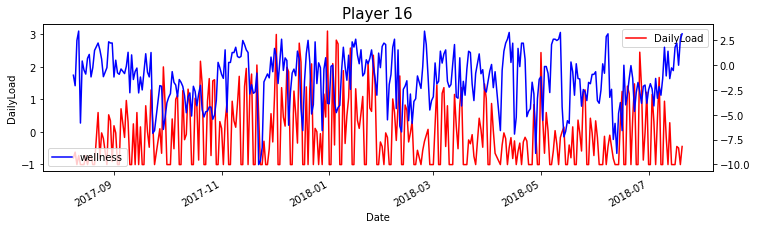

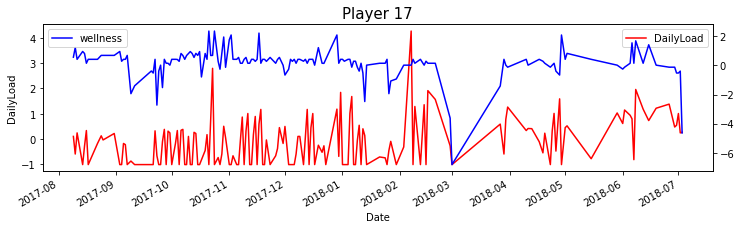

In [17]:
grouped = processed.groupby(['PlayerID'])

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(111)

    group.plot.line(ax=ax1, color='red',x="Date",y="DailyLoad")
    ax1.set_ylabel('DailyLoad')
    ax3 = ax1.twinx()
    group.plot.line(ax=ax3, color='blue',x="Date",y="wellness")

    ax1.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

In [18]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# merged_df['SquaredAcuteChronicRatio'] = merged_df['AcuteChronicRatio'] ** 2
# merged_df['CubedAcuteChronicRatio'] = merged_df['AcuteChronicRatio'] ** 3

fam = sm.families.Gaussian()
ind = sm.cov_struct.Exchangeable()
# ind = sm.cov_struct.Independence()
mod = smf.gee("wellness ~ DailyLoad", "PlayerID", processed, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:                    wellness   No. Observations:                 4047
Model:                                 GEE   No. clusters:                       17
Method:                        Generalized   Min. cluster size:                 121
                      Estimating Equations   Max. cluster size:                 343
Family:                           Gaussian   Mean cluster size:               238.1
Dependence structure:         Exchangeable   Num. iterations:                     4
Date:                     Sun, 01 Dec 2019   Scale:                           6.721
Covariance type:                    robust   Time:                         22:59:25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0808      0.372      0.217      0.828      -0.648       0.810
DailyLo

In [190]:
processed = processed.dropna()
mixed = smf.mixedlm("wellness ~ DailyLoad", processed, groups = processed["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: wellness  
No. Observations: 4030    Method:             REML      
No. Groups:       17      Scale:              4.3017    
Min. group size:  120     Likelihood:         -8701.1032
Max. group size:  342     Converged:          Yes       
Mean group size:  237.1                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.076    0.383  0.199 0.842 -0.674  0.826
DailyLoad     -0.094    0.033 -2.816 0.005 -0.159 -0.028
Group Var      2.468    0.425                           



In [191]:
processed['wellness'].std()

2.59222067291003

In [192]:
processed['wellness'].quantile(0.25)

-1.2895126544726798

In [193]:
processed['wellness'].median()

0.4197186971614448

In [194]:
processed['wellness'].quantile(0.75)

1.8295631477803507

In [195]:
processed['DailyLoad'].std()

1.001049905211623

In [196]:
processed['DailyLoad'].quantile(0.25)

-1.0128931791732334

In [197]:
processed['DailyLoad'].quantile(0.4)

-0.5715955652859062

In [198]:
processed['DailyLoad'].median()

-0.22320271221696367

In [199]:
processed['DailyLoad'].quantile(0.60)

0.148416331056575

In [200]:
processed['DailyLoad'].quantile(0.75)

0.7290710861714792

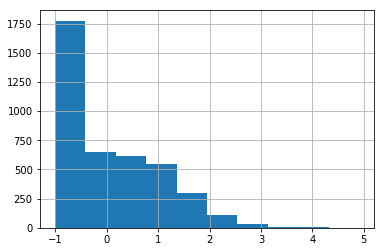

In [201]:
processed['DailyLoad'].hist()

# Performance vs yesterday's daily load

In [19]:
gps_df = pd.read_csv('./processed_data/processed_gps.csv')
gps_df = gps_df.drop(columns=['Unnamed: 0'])
gps_df['Date'] = pd.to_datetime(gps_df['Date'],format='%Y-%m-%d')
print(gps_df.head())

        Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0 2017-11-30       1       W          19         2        7.284728   
1 2017-11-30       1       W          19         3        6.852436   
2 2017-11-30       1       W          19         4        7.267784   
3 2017-11-30       1       W          19         6        6.338894   
4 2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  
0               4.423615  
1               4.888893  
2               5.694449  
3               4.777782  
4               4.091273  


In [20]:
speed_vs_yesterday_load = gps_df.merge(yesterday_rpe,
    how='inner', on= ['Date','PlayerID'])[['Date','PlayerID','DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']].drop_duplicates()

processed_speed = speed_vs_yesterday_load.copy()
processed_speed[['DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']] = StandardScaler().fit_transform(processed_speed[['DailyLoad','MaxSpeedInGame','MaxAccelImpulseInGame']])


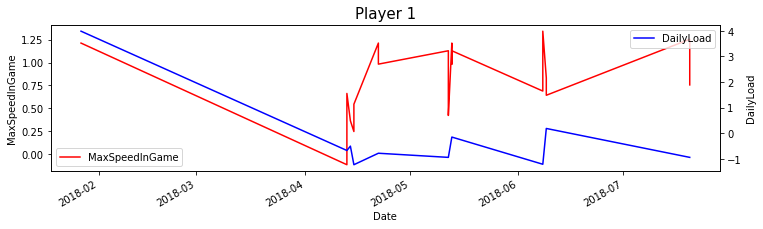

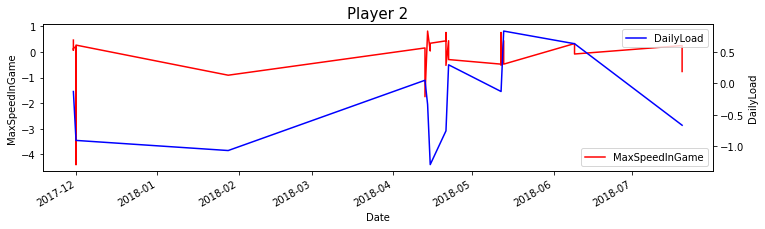

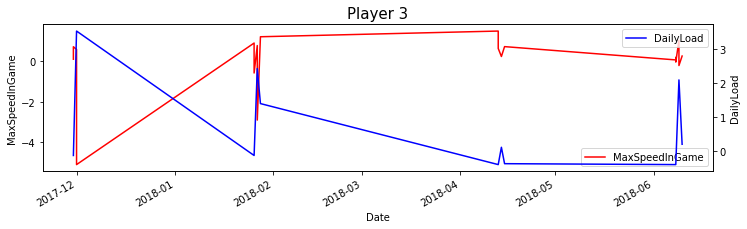

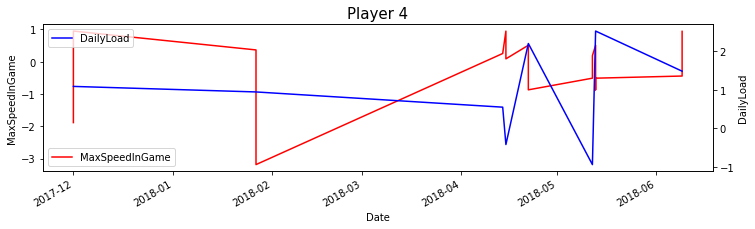

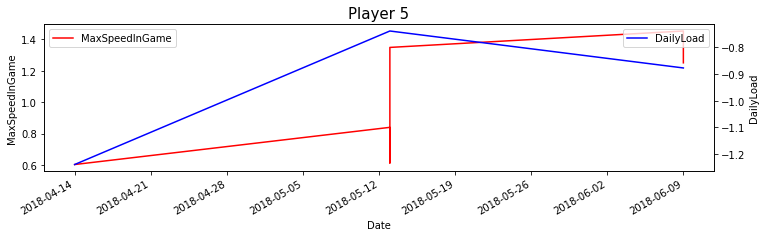

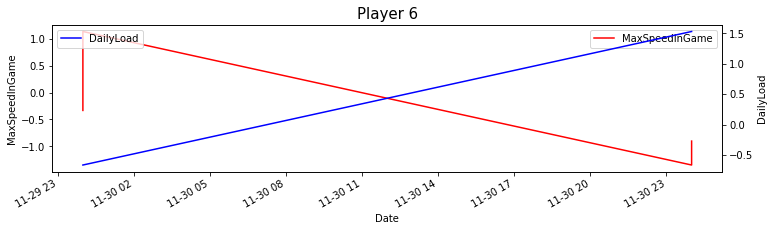

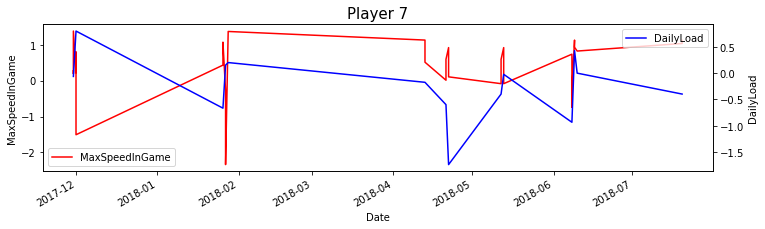

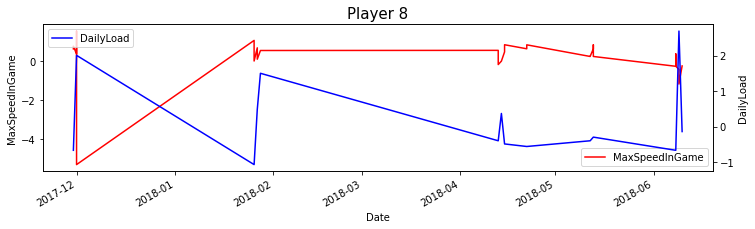

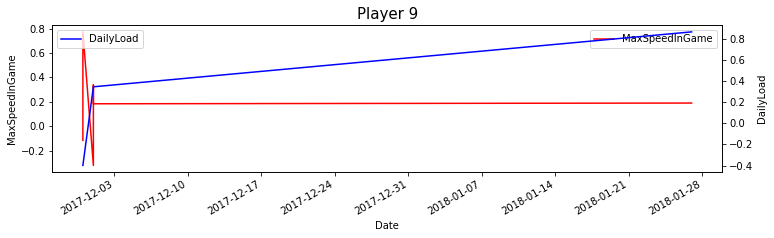

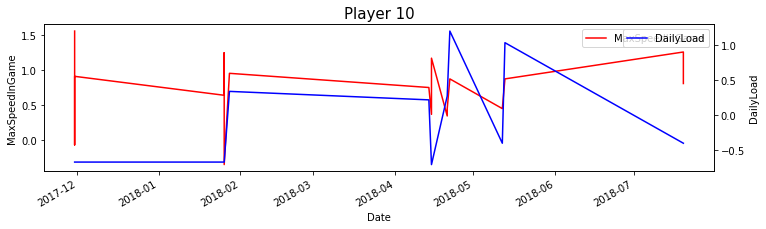

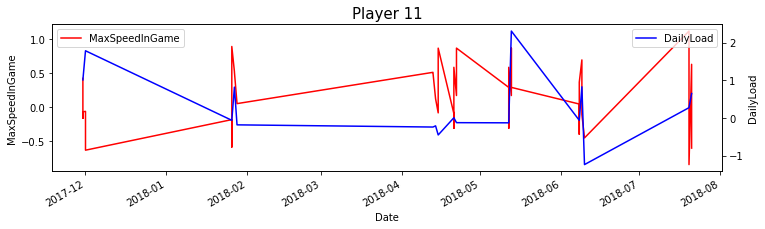

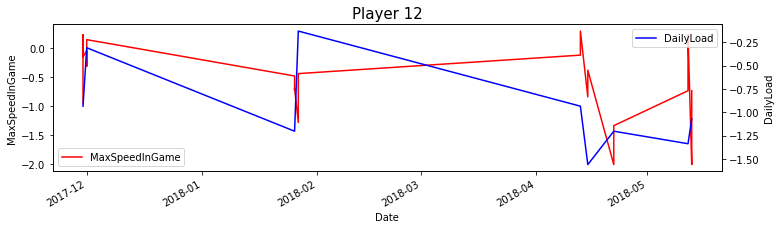

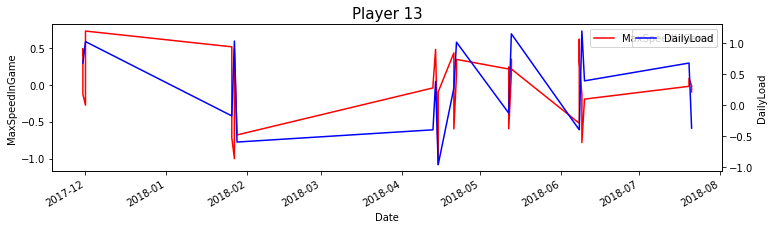

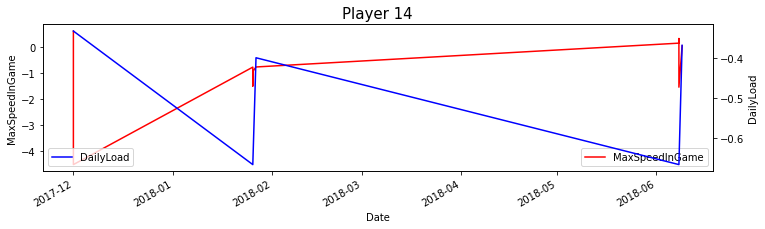

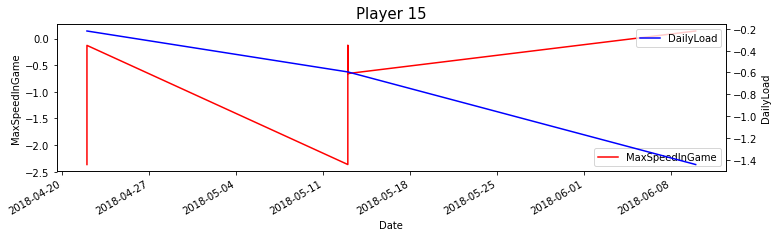

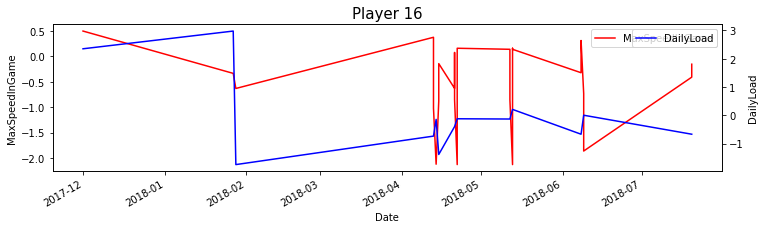

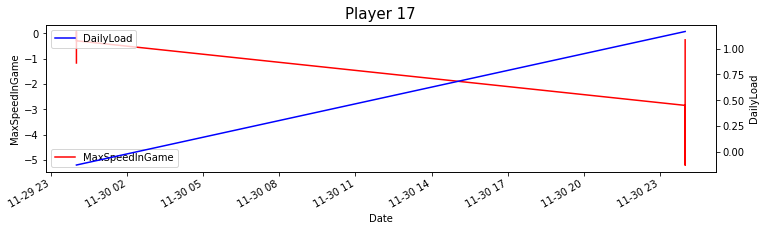

In [26]:
grouped = processed_speed.groupby(['PlayerID'])

for name,group in grouped:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(111)
#     group[]
    group.plot.line(ax=ax1, color='red',x="Date",y="MaxSpeedInGame")
    ax1.set_ylabel('MaxSpeedInGame')
    ax3 = ax1.twinx()
    group.plot.line(ax=ax3, color='blue',x="Date",y="DailyLoad")
    ax3.set_ylabel('DailyLoad')
    ax1.set_title('Player ' + str(name), fontsize=15)

plt.show()
plt.close()

In [29]:
mod = smf.gee("MaxSpeedInGame ~ DailyLoad", "PlayerID", processed_speed, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

                               GEE Regression Results                              
Dep. Variable:              MaxSpeedInGame   No. Observations:                  333
Model:                                 GEE   No. clusters:                       17
Method:                        Generalized   Min. cluster size:                   5
                      Estimating Equations   Max. cluster size:                  38
Family:                           Gaussian   Mean cluster size:                19.6
Dependence structure:         Exchangeable   Num. iterations:                     8
Date:                     Sun, 01 Dec 2019   Scale:                           0.999
Covariance type:                    robust   Time:                         23:12:53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0634      0.138     -0.459      0.646      -0.334       0.208
DailyLo

In [205]:
print(len(gps_df),len(processed_speed))
mixed = smf.mixedlm("MaxSpeedInGame ~ DailyLoad", processed_speed, groups = processed_speed["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())

443 333
           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: MaxSpeedInGame
No. Observations: 333     Method:             REML          
No. Groups:       17      Scale:              0.7819        
Min. group size:  5       Likelihood:         -451.2020     
Max. group size:  38      Converged:          Yes           
Mean group size:  19.6                                      
-------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-------------------------------------------------------------
Intercept     -0.084     0.153  -0.547  0.584  -0.383   0.216
DailyLoad     -0.153     0.055  -2.768  0.006  -0.261  -0.045
Group Var      0.336     0.172                               



Previous day's daily load negativel affects today's performance as well as wellness.

In [206]:
print(processed_speed['MaxSpeedInGame'].std())
print(processed_speed['DailyLoad'].std())
print(processed_speed['MaxSpeedInGame'].median())
print(processed_speed['DailyLoad'].median())
print(processed_speed['MaxSpeedInGame'].quantile(0.75))
print(processed_speed['DailyLoad'].quantile(0.75))

1.0015048917468008
1.0015048917468015
0.18326740130687724
-0.17453303454896157
0.6032002804916922
0.38017894687004394


# Performance vs training load and wellness

In [30]:
all_data = pd.read_csv('./processed_data/merged_df.csv')
all_data = all_data.drop(columns=['Unnamed: 0'])
print(all_data.head())

         Date  GameID Outcome  TeamPoints  PlayerID  MaxSpeedInGame  \
0  2017-11-30       1       W          19         2        7.284728   
1  2017-11-30       1       W          19         3        6.852436   
2  2017-11-30       1       W          19         4        7.267784   
3  2017-11-30       1       W          19         6        6.338894   
4  2017-11-30       1       W          19         7        7.065283   

   MaxAccelImpulseInGame  AcuteLoad  ChronicLoad  AcuteChronicRatio  \
0               4.423615     206.57       371.20               0.56   
1               4.888893     407.86       454.67               0.90   
2               5.694449     236.00       406.90               0.58   
3               4.777782     297.29       415.87               0.71   
4               4.091273     237.57       476.60               0.50   

   MonitoringScore  TrainingReadiness      Pain   Illness  Nutrition  wellness  
0         0.981035          -1.826823  0.364611  0.301008  -1.220

In [31]:
processed_merged = all_data.copy()
processed_merged[['AcuteChronicRatio','MaxSpeedInGame','MaxAccelImpulseInGame']] = StandardScaler().fit_transform(processed_merged[['AcuteChronicRatio','MaxSpeedInGame','MaxAccelImpulseInGame']])

processed_merged = processed_merged.dropna()
print(processed_merged.columns)

mod = smf.gee("MaxAccelImpulseInGame ~ MonitoringScore + AcuteChronicRatio","PlayerID", processed_merged, cov_struct=ind, family=fam)
res = mod.fit()
print(res.summary())

mixed = smf.mixedlm("MaxAccelImpulseInGame ~ MonitoringScore + AcuteChronicRatio", processed_merged, groups = processed_merged["PlayerID"])
mixed_fit = mixed.fit()
print(mixed_fit.summary())

Index(['Date', 'GameID', 'Outcome', 'TeamPoints', 'PlayerID', 'MaxSpeedInGame',
       'MaxAccelImpulseInGame', 'AcuteLoad', 'ChronicLoad',
       'AcuteChronicRatio', 'MonitoringScore', 'TrainingReadiness', 'Pain',
       'Illness', 'Nutrition', 'wellness'],
      dtype='object')
                               GEE Regression Results                               
Dep. Variable:        MaxAccelImpulseInGame   No. Observations:                  443
Model:                                  GEE   No. clusters:                       17
Method:                         Generalized   Min. cluster size:                   5
                       Estimating Equations   Max. cluster size:                  38
Family:                            Gaussian   Mean cluster size:                26.1
Dependence structure:          Exchangeable   Num. iterations:                     7
Date:                      Sun, 01 Dec 2019   Scale:                           1.007
Covariance type:                     r